# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.001
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.001
0.001
0.001
0.0
0.0
0.004
-0.001
-0.003
-0.003
-0.003
-0.001
-0.003
-0.003
-0.004
0.973
0.976
0.976
0.976
0.976
1.944
1.948
1.948
1.947
1.948
2.924
2.927
2.928
2.927
2.926
3.925
3.93
3.93
3.929
3.929
4.908
4.908
4.908
4.907
5.879
5.883
5.883
5.881
5.882
6.732
6.735
6.736
6.735
6.736
7.577
7.582
7.582
7.581
7.582
8.553
8.558
8.558
8.557
8.556
9.555
9.56
9.56
9.558
9.558
10.54
10.545
10.545
10.544
10.543
11.526
11.529
11.53
11.529
11.528
12.501
12.503
12.504
12.504
12.503
13.483
13.483
13.481
13.481
14.428
14.429
14.432
14.432
14.431
15.424
15.428
15.428
15.427
15.428
16.425
16.425
16.425
16.424
17.423
17.423
17.421
17.42
18.415
18.419
18.419
18.417
18.419
19.416
19.415
19.414
19.414
20.408
20.413
20.412
20.412
20.411
21.279
21.279
21.285
21.278
22.146
22.146
22.146
22.146
23.127
23.127
23.125
23.125
24.105
24.105
24.105
25.084
25.084
25.082
25.082
26.086
26.086
26.084
26.084
27.087
27.087
27.086
27.086
28.088
28.08

57.253
57.253
57.253
57.253
57.253
57.253
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.252
57.251
57.25
57.676
57.675
57.677
57.678
57.676
57.676
57.676
57.676
57.676
57.675
57.674
57.674
57.674
57.674
57.674
57.674
57.674
57.674
57.673
57.673
57.672
57.672
57.672
57.672
57.672
57.672
57.672
57.673
57.673
57.673
57.673
57.673
57.672
57.672
57.672
57.671
57.672
57.67
57.67
57.67
57.669
57.669
57.741
57.741
57.801
57.801
57.801
57.801
57.86
57.86
57.859
57.859
57.859
57.859
57.859
57.911
57.911
57.91
57.912
57.911
57.91
57.91
57.909
57.909
57.909
57.909
57.909
57.909
57.909
57.908
57.908
57.908
57.907
57.907
57.907
57.907
57.906
57.906
57.906
57.906
57.906
57.906
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.905
57.904
58.18
58.179
58.179
58.179
58.179
58.179
58.178
58.178
58.178
58.178
58.178
58.178
58.18
58.179
58.178
58.177
58.177
58.177
58.177
58.176
58.176
58.176
58.176
58.176
58.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.001
1,2,0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1479,2958,60.216
1480,2960,60.216
1481,2962,60.214
1482,2964,60.215


<IPython.core.display.Javascript object>


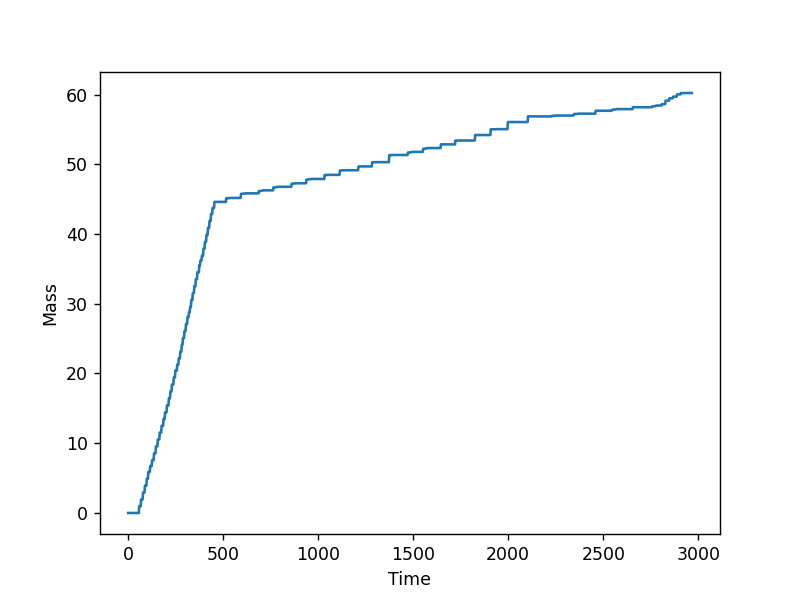

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_130623_S613-618.csv')